# **LATAR BELAKANG**

Sebuah perusahaan taksi/rental mobil di New York City menghadapi tantangan untuk memaksimalkan profit dalam industri yang sangat kompetitif. Dengan munculnya layanan transportasi daring, perusahaan-perusahaan taksi tradisional harus menyesuaikan strategi mereka agar tetap relevan dan menguntungkan bagi perusahaan. Berdasarkan data yang disediakan oleh New York City Taxi and Limousine Commission (TLC), terdapat beberapa aspek utama yang memengaruhi profitabilitas perusahaan taksi, seperti metode pembayaran, jam ramai, serta jarak dan zona perjalanan.

Data tersebut dapat  dimanfaatkan untuk menganalisis tren pendapatan dan mengidentifikasi faktor-faktor yang paling berpengaruh terhadap profit. Pemahaman yang mendalam atas data ini penting untuk menemukan peluang peningkatan profit, terutama pada masa-masa tertentu, seperti jam sibuk atau musim liburan, di mana permintaan akan layanan taksi/rental mobil meningkat.

Dengan memetakan pola permintaan, perusahaan dapat menempatkan armada mereka di area dengan permintaan tinggi sehingga meningkatkan kemungkinan mendapatkan penumpang dan memaksimalkan penggunaan armada. Strategi pemasaran dan program loyalitas juga dapat diperkuat untuk menarik pelanggan dan mempertahankan mereka dalam jangka panjang. Dengan pendekatan berbasis data ini, perusahaan dapat mengambil keputusan yang lebih informasional dan berbasis bukti untuk meningkatkan profitabilitas di pasar yang sangat kompetitif.


# **Tujuan**

Untuk menganalisa peluang pada Taksi/Rental mobil tersebut yang harus dilakukan adalah melakukan evaluasi pada data yang telah dimiliki sebelumnya. Adapun tujuan yang akan di analisis adalah:

1. Apakah terdapat jam ramai terkait banyaknya armada yang di sewa? 
2. Berdasarkan data yg dimiliki, Tipe Perjalanan dan Metode Pembayaran apa yang paling di minati oleh pelanggan? 
3. Zona manakah yang paling ramai?

# **PROSES DATA**

In [145]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

warnings.filterwarnings('ignore')

In [146]:
df = pd.read_csv("NYC TLC Trip Record.csv")
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


**DESKRIPSI KOLOM**

Data berikut berisi tentang:

1. **VendorID**: Kode yang menunjukkan penyedia LPEP (sistem perekaman perjalanan) yang menyediakan data ini.
   - 1 = Creative Mobile Technologies, LLC.
   - 2 = VeriFone Inc.

2. **lpep_pickup_datetime**: Tanggal dan waktu saat meteran taksi mulai berjalan, menandai awal perjalanan.

3. **lpep_dropoff_datetime**: Tanggal dan waktu saat meteran taksi berhenti, menandai akhir perjalanan.

4. **Passenger_count**: Jumlah penumpang di kendaraan, yang dimasukkan oleh pengemudi.

5. **Trip_distance**: Jarak tempuh perjalanan dalam mil, yang dilaporkan oleh meteran taksi.

6. **PULocationID**: ID zona lokasi TLC di mana meteran taksi diaktifkan atau tempat penjemputan.

7. **DOLocationID**: ID zona lokasi TLC di mana meteran taksi dihentikan atau tempat tujuan.

8. **RateCodeID**: Kode tarif yang berlaku pada akhir perjalanan.
   - 1 = Tarif standar
   - 2 = JFK
   - 3 = Newark
   - 4 = Nassau atau Westchester
   - 5 = Tarif yang dinegosiasikan
   - 6 = Perjalanan grup

9. **Store_and_fwd_flag**: Tanda yang menunjukkan apakah catatan perjalanan disimpan sementara di memori kendaraan sebelum dikirim ke penyedia karena tidak ada koneksi ke server.
   - Y = Perjalanan disimpan dan diteruskan kemudian
   - N = Perjalanan tidak disimpan sementara

10. **Payment_type**: Kode yang menunjukkan cara pembayaran yang dilakukan oleh penumpang.
    - 1 = Kartu kredit
    - 2 = Tunai
    - 3 = Tanpa biaya
    - 4 = Perselisihan
    - 5 = Tidak diketahui
    - 6 = Perjalanan dibatalkan

11. **Fare_amount**: Biaya perjalanan berdasarkan jarak dan waktu yang dihitung oleh meteran.

12. **Extra**: Biaya tambahan, termasuk biaya tambahan jam sibuk ($0.50 atau $1 untuk jam sibuk dan tengah malam).

13. **MTA_tax**: Pajak MTA sebesar $0.50 yang diterapkan secara otomatis berdasarkan tarif meter yang digunakan.

14. **Improvement_surcharge**: Biaya peningkatan sebesar $0.30 yang dikenakan pada perjalanan yang dimulai sejak tahun 2015.

15. **Tip_amount**: Jumlah tip yang diberikan, secara otomatis diisi untuk pembayaran dengan kartu kredit (tidak termasuk tip tunai).

16. **Tolls_amount**: Total biaya tol yang dibayar dalam perjalanan.

17. **Total_amount**: Total biaya yang dibebankan kepada penumpang (tidak termasuk tip tunai).

18. **Trip_type**: Kode yang menunjukkan apakah perjalanan adalah "street-hail" (perjalanan yang dipanggil langsung di jalan) atau "dispatch" (pesanan taksi yang diatur sebelumnya).
    - 1 = Street-hail
    - 2 = Dispatch

19. **congestion_surcharge**: biaya tambahan kemacetan yang dikenakan pada perjalanan taksi, Besarnya biaya ini adalah sebesar $2.75 untuk taksi biasa dan sekitar $2.50 untuk kendaraan sewa lainnya.

Sebelum masuk ke tahap analisis, kita perlu mengenal dataset yang digunakan. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan langkah yang diambil. Berikut adalah info general dari data set yang di miliki

In [147]:
# Pengecekan General Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

Setelah mempelajari data dari general info, maka kita dapat melakukan pengecekan missing value pada data.

In [148]:
# Melakukan pengecekan berapa banyak missing value yang ada di sebuah table

df.isna().sum()/len(df)*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

Dari data di atas, dapat dilihat bahwa pada kolom ehail_fee terdapat missing value pada seluruh data (100%) dan terdapat juga missing value pada kolom store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type dan congestion_surcharge dengan jumlah missing value yang sama yaitu sebesar > 6%.

terdapat 2 cara yang akan dilakukan yaitu:
1. pada kolom ehail_fee akan dilakukan penghapusan kolom karena missing valuenya 100%
2. pada kolom yang missing valuenya > 6% akan dilakukan penhapusan baris

In [149]:
# penghapusan untuk baris dengan missing value 6%
rental_clean = df.dropna(axis = 0,
                        subset=['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge'])

# penghapusan kolom ehail_fee karena missing valuenya 100%
rental_clean = rental_clean.drop(columns='ehail_fee')

# penghapusan untuk baris dengan jarak tempuh = 0
rental_clean = rental_clean[rental_clean['trip_distance'] != 0]


rental_clean


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


Setelah melakukan penghapusan missing value, kita dapat mengecek kembali apakah masih ada data yang kosong atau seluruh proses sudah ter aplikasikan.

In [150]:
#cek lagi apakah masih ada data yang terdapat missing value

rental_clean.isna().sum()/len(rental_clean)*100

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: float64

setelah selesai memproses missing value, selanjutnya adalah pengecekan outliers.

* Outliers pertama yang akan di cek adalah data tahun yang terdapat pada kolom "lpep_pickup_datetime", kenapa hanya data tahun saja? karna di harapkan agar lebih spesifik pengecekan penyebaran data pada data kolom "lpep_pickup_datetime".

In [151]:
year = pd.to_datetime(rental_clean["lpep_pickup_datetime"]).dt.strftime('%Y')
year.value_counts()


lpep_pickup_datetime
2023    60677
2022        2
2009        1
Name: count, dtype: int64

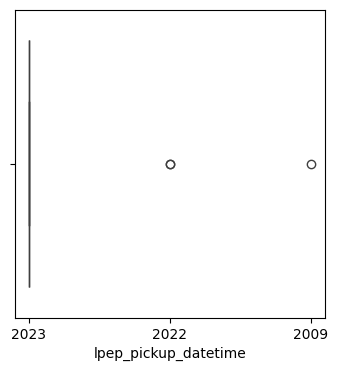

In [152]:
# Pengecekan outliers dengan boxplot pada data tahun

plt.figure(figsize=(4,4))
sns.boxplot(data=rental_clean,
            x= pd.to_datetime(rental_clean["lpep_pickup_datetime"]).dt.strftime('%Y'))
plt.show()

Dari data di atas, dapat di ketahui pada kolom "lpep_pickup_datetime" lebih spesifik lagi adalah pengecekan Tahun nya saja memiliki outliers yg extrim yaitu tahun 2009 dan 2022. berdasarkan hasil data tersebut maka akan di lakukan penghapusan outliers pada data tahun tersebut.

untuk mempermudah penghapusan outliers, maka kita menambahkan kolom Year pada dataset yang dimiliki. penambahan kolom diletakan pada kolom ke 2 yaitu setelah kolom VendorID.

In [153]:
# melakukan pemisahan data tahun untuk dilakukan delete outliers

# memisahkan tahun berdasarkan waktu pick up, dan diletakkan di kolom ke 2
rental_clean.insert(loc=1, column='Year', value= pd.to_datetime(rental_clean['lpep_pickup_datetime']).dt.strftime('%Y'))

# cek apakah sudah ada kolom Year
rental_clean            

,VendorID,Year,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
3,1,2023,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
5,2,2023,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


Setelah Kolom Year muncul pada dataset, maka langkah selanjutnya adalah penghapusan outliers.
penghapusan outliers dilakukan dengan cara menghapus baris yang tahunnya dibawah tahun 2023 dengan menggunakan fungsi .drop()

Setelah penghapusan outliers dilakukan, maka kolom Year akan di hapus lagi karena kolom tersebut tidak akan digunakan kembali

In [154]:
# penghapusan untuk baris dengan outliers yang tahunnya dibawah tahun 2023
rental_clean = rental_clean.drop(rental_clean[rental_clean["Year"] < "2023"].index) 

# penghapusan kolom tahun karena sudah tidak di perlukan
rental_clean = rental_clean.drop(columns='Year')

rental_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


Setelah melakukan penghapusan outliers pda Tahun, langkah selanjutnya adalah melakukan pengecekan kembali apakah data outliers yang sudah di hapus hilang.
dari grafik boxplot menunjukan bahwa data outliers pada kolom tahun sudah hilang

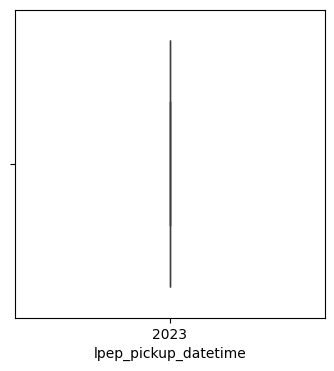

In [155]:
# Pengecekan kembali apakah masih ada outliers dengan boxplot
# sudah tidak ada outliers di kolom tahun 

plt.figure(figsize=(4,4))
sns.boxplot(data=rental_clean,
            x= pd.to_datetime(rental_clean["lpep_pickup_datetime"]).dt.strftime('%Y'))
plt.show()

Selanjutnya adalah melakukan pengecekan outliers pada kolom total amount dengan menggunakan boxplot

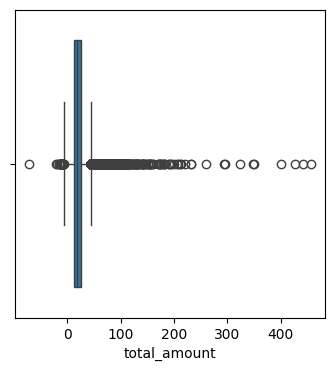

In [156]:
# Pengecekan outliers di bagian total_amount

plt.figure(figsize=(4,4))
sns.boxplot(data=rental_clean,
            x= rental_clean["total_amount"])
plt.show()

Data cleaning selanjutnya adalah lekakukan pengecekan apakah terdapat duplikat data pada dataset yang dimiliki. dari hasil tersebut ditemukan 105 data set yang memiliki duplikat dengan parameter 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID' dan 'DOLocationID'

Data set yang duplikat harus di hapus, agar tidak terjadi double data

In [157]:
# Cek duplikat data berdasarkan kolom tertentu

data_duplikat = rental_clean.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID']).sum()
print(f"Jumlah data yang duplikat: {data_duplikat}")

rental_clean[rental_clean.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'])]

Jumlah data yang duplikat: 105


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.0,0.5,0.0,0.0,1.0,4.5,3.0,1.0,0.0
1318,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,8.6,1.0,0.5,0.0,0.0,1.0,11.1,3.0,1.0,0.0
1687,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,4.5,0.0,0.5,0.0,0.0,0.3,5.3,4.0,1.0,0.0
1865,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,3.7,0.0,0.5,0.0,0.0,1.0,5.2,3.0,1.0,0.0
2482,2,2023-01-02 19:03:48,2023-01-02 19:04:24,N,1.0,130,130,1.0,0.11,3.0,0.0,0.5,0.0,0.0,1.0,4.5,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60963,2,2023-01-30 15:57:52,2023-01-30 16:00:00,N,1.0,41,41,1.0,0.37,4.4,2.5,0.5,0.0,0.0,1.0,8.4,4.0,1.0,0.0
61103,2,2023-01-30 17:17:09,2023-01-30 17:33:27,N,1.0,260,82,1.0,0.67,14.2,2.5,0.5,0.0,0.0,1.0,18.2,3.0,1.0,0.0
63359,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,3.0,2.5,0.5,0.0,0.0,1.0,7.0,4.0,1.0,0.0
63545,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,3.0,2.5,0.5,0.0,0.0,1.0,7.0,3.0,1.0,0.0


Berikut ini adalah proses penghapusan data duplikat. proses penghapusan duplikat menggukan fungsi .drop_duplicate dengan parameter 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'

setelah penghapusan, maka di lakukan pengecekan kembali data duplikat sudah terhapus atau belum

In [158]:
# Handle Duplicate data dan outliers

rental_clean = rental_clean.drop_duplicates(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'], keep="last")


# Cek kembali apakah masih ada duplikat data berdasarkan kolom tertentu

data_duplikat = rental_clean.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID']).sum()
print(f"Jumlah data yang duplikat: {data_duplikat}")

rental_clean[rental_clean.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'])]

Jumlah data yang duplikat: 0


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


pengecekan juga dilakukan kembali pada outliers total amount masih ada atau tidak

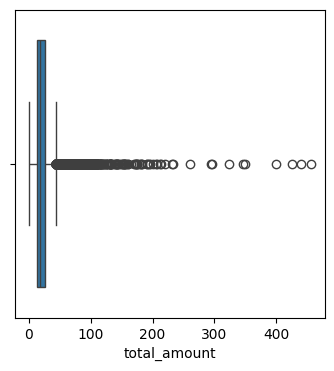

In [159]:
# Pengecekan kembali apakah masih ada outliers di bagian total_amount
# sudah tidak ada outliers minus pada total_ammot karna sudah di drop di bagian duplicate

plt.figure(figsize=(4,4))
sns.boxplot(data=rental_clean,
            x= rental_clean["total_amount"])
plt.show()

Selanjutnya melakukan pengecekan anomali lain untuk type pembayaran selain kartu kredit dan uang tunai.

In [160]:
rental_clean['payment_type'].value_counts()

payment_type
1.0    38436
2.0    21860
3.0      226
4.0       50
Name: count, dtype: int64

Handle data anomali lain selain angka 1 & 2 pada type pembayaran

In [161]:
# Menyaring kembali data untuk mengambil hanya Payment_type dengan nilai 1 atau 2
rental_clean = rental_clean[rental_clean['payment_type'].isin([1, 2])]

rental_clean['payment_type'].value_counts()

payment_type
1.0    38436
2.0    21860
Name: count, dtype: int64

Setelah selesai melakukan pengecekan data outliers, duplicate dan anomali lain maka langkah selanjutnya adalah pengecekan data general kembali untuk memastikan seluruh prosesnya telah terlaksana

In [162]:
#pengecekan seluruh data cleaning

display(rental_clean.info())
display(rental_clean.isna().sum()/len(rental_clean)*100)
rental_clean

<class 'pandas.core.frame.DataFrame'>
Index: 60296 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               60296 non-null  int64  
 1   lpep_pickup_datetime   60296 non-null  object 
 2   lpep_dropoff_datetime  60296 non-null  object 
 3   store_and_fwd_flag     60296 non-null  object 
 4   RatecodeID             60296 non-null  float64
 5   PULocationID           60296 non-null  int64  
 6   DOLocationID           60296 non-null  int64  
 7   passenger_count        60296 non-null  float64
 8   trip_distance          60296 non-null  float64
 9   fare_amount            60296 non-null  float64
 10  extra                  60296 non-null  float64
 11  mta_tax                60296 non-null  float64
 12  tip_amount             60296 non-null  float64
 13  tolls_amount           60296 non-null  float64
 14  improvement_surcharge  60296 non-null  float64
 15  total_a

None

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: float64

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


Langkah terakhir adalah melakukan perubahan nama kolom agar user/stake holder dapat dengan mudah memahami nama kolom tersebut

In [163]:
# Merubah Judul Kolom
 
# Terdapat beberapa nama kolom yang perlu di perbaharui agar mudah di mengerti oleh pembaca

# Judul kolom lama pada data rental clean
rental_clean = rental_clean[["VendorID",
                             "lpep_pickup_datetime",
                             "lpep_dropoff_datetime",
                             "store_and_fwd_flag",
                             "RatecodeID",
                             "PULocationID",
                             "DOLocationID",
                             "passenger_count",
                             "trip_distance",
                             "fare_amount",
                             "extra",
                             "mta_tax",
                             "tip_amount",
                             "tolls_amount",
                             "improvement_surcharge",
                             "total_amount",
                             "payment_type",
                             "trip_type",
                             "congestion_surcharge"]]

rental_old_name = rental_clean.columns.to_list()

# Judul kolom baru pada data rental clean
rental_new_name = ["VendorID",
                   "Waktu_Pickup",
                   "Waktu_Dropoff",
                   "Memori_Unit",
                   "Tipe_Tarif",
                   "IDZona_Pickup",
                   "IDZona_Dropoff",
                   "Jumlah_Penumpang",
                   "Jarak_Tempuh",
                   "Biaya Perjalanan",
                   "Add-On",
                   "Pajak_MTA",
                   "Tips",
                   "Biaya_Tol",
                   "Biaya_Improve_Kendaraan",
                   "Total_Biaya",
                   "Metode_Pembayaran",
                   "Tipe_Perjalanan",
                   "Tarif_Tambahan_Kemacetan"]

display(rental_old_name, len(rental_old_name),
        rental_new_name, len(rental_new_name))

# Melakukan fungsi .rename agar terubah dan inplace=True agar terubah secara permanent pada data rental_clean
rental_clean.rename(columns = dict(zip(rental_old_name, rental_new_name)),
               inplace = True)

rental_clean

['VendorID',
 'lpep_pickup_datetime',
 'lpep_dropoff_datetime',
 'store_and_fwd_flag',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'payment_type',
 'trip_type',
 'congestion_surcharge']

19

['VendorID',
 'Waktu_Pickup',
 'Waktu_Dropoff',
 'Memori_Unit',
 'Tipe_Tarif',
 'IDZona_Pickup',
 'IDZona_Dropoff',
 'Jumlah_Penumpang',
 'Jarak_Tempuh',
 'Biaya Perjalanan',
 'Add-On',
 'Pajak_MTA',
 'Tips',
 'Biaya_Tol',
 'Biaya_Improve_Kendaraan',
 'Total_Biaya',
 'Metode_Pembayaran',
 'Tipe_Perjalanan',
 'Tarif_Tambahan_Kemacetan']

19

,VendorID,Waktu_Pickup,Waktu_Dropoff,Memori_Unit,Tipe_Tarif,IDZona_Pickup,IDZona_Dropoff,Jumlah_Penumpang,Jarak_Tempuh,Biaya Perjalanan,Add-On,Pajak_MTA,Tips,Biaya_Tol,Biaya_Improve_Kendaraan,Total_Biaya,Metode_Pembayaran,Tipe_Perjalanan,Tarif_Tambahan_Kemacetan
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


**DESKRIPSI KOLOM**

Data berikut berisi tentang:

1. **VendorID**: Kode yang menunjukkan penyedia LPEP (sistem perekaman perjalanan) yang menyediakan data ini.
   - 1 = Creative Mobile Technologies, LLC.
   - 2 = VeriFone Inc.

2. **Waktu_Pickup**: Tanggal dan waktu saat meteran taksi mulai berjalan, menandai awal perjalanan.

3. **Waktu_Dropoff**: Tanggal dan waktu saat meteran taksi berhenti, menandai akhir perjalanan.

4. **Jumlah_Penumpang**: Jumlah penumpang di kendaraan, yang dimasukkan oleh pengemudi.

5. **Jarak_Tempuh**: Jarak tempuh perjalanan dalam mil, yang dilaporkan oleh meteran taksi.

6. **IDZona_Pickup**: ID zona lokasi TLC di mana meteran taksi diaktifkan atau tempat penjemputan.

7. **IDZona_Dropoff**: ID zona lokasi TLC di mana meteran taksi dihentikan atau tempat tujuan.

8. **Tipe_Tarif**: Kode tarif yang berlaku pada akhir perjalanan.
   - 1 = Tarif standar
   - 2 = JFK
   - 3 = Newark
   - 4 = Nassau atau Westchester
   - 5 = Tarif yang dinegosiasikan
   - 6 = Perjalanan grup

9. **Memori_Unit**: Tanda yang menunjukkan apakah catatan perjalanan disimpan sementara di memori kendaraan sebelum dikirim ke penyedia karena tidak ada koneksi ke server.
   - Y = Perjalanan disimpan dan diteruskan kemudian
   - N = Perjalanan tidak disimpan sementara

10. **Metode_Pembayaran**: Kode yang menunjukkan cara pembayaran yang dilakukan oleh penumpang.
    - 1 = Kartu kredit
    - 2 = Tunai
    - 3 = Tanpa biaya
    - 4 = Perselisihan
    - 5 = Tidak diketahui
    - 6 = Perjalanan dibatalkan

11. **Biaya Perjalanan**: Biaya perjalanan berdasarkan jarak dan waktu yang dihitung oleh meteran.

12. **Add-On**: Biaya tambahan, termasuk biaya tambahan jam sibuk ($0.50 atau $1 untuk jam sibuk dan tengah malam).

13. **Pajak_MTA**: Pajak MTA sebesar $0.50 yang diterapkan secara otomatis berdasarkan tarif meter yang digunakan.

14. **Biaya_Improve_Kendaraan**: Biaya peningkatan sebesar $0.30 yang dikenakan pada perjalanan yang dimulai sejak tahun 2015.

15. **Tips**: Jumlah tip yang diberikan, secara otomatis diisi untuk pembayaran dengan kartu kredit (tidak termasuk tip tunai).

16. **Biaya_Tol**: Total biaya tol yang dibayar dalam perjalanan.

17. **Total_Biaya**: Total biaya yang dibebankan kepada penumpang (tidak termasuk tip tunai).

18. **Tipe_Perjalanan**: Kode yang menunjukkan apakah perjalanan adalah "street-hail" (perjalanan yang dipanggil langsung di jalan) atau "dispatch" (pesanan taksi yang diatur sebelumnya).
    - 1 = Street-hail
    - 2 = Dispatch

19. **Tarif_Tambahan_Kemacetan**: biaya tambahan kemacetan yang dikenakan pada perjalanan taksi, Besarnya biaya ini adalah sebesar $2.75 untuk taksi biasa dan sekitar $2.50 untuk kendaraan sewa lainnya.

In [164]:
# melakukan perubahan kode pada kolom Tipe_Tarif, Metode_Pembayaran dan	Tipe_Perjalanan


# perubahan kode di tipe tarif
tipe_tarif_replace = {
    1: "Tarif standar",
    2: "JFK",
    3: "Newark",
    4: "Nassau atau Westchester",
    5: "Tarif yang dinegosiasikan",
    6: "Perjalanan grup"
}

# perubahan kode di tipe metode pembayaran
metode_pembayaran_replace = {
    1: "Kartu kredit",
    2: "Tunai",
    3: "Tanpa biaya",
    4: "Perselisihan",
    5: "Tidak diketahui",
    6: "Perjalanan dibatalkan"
}

# perubahan kode di tipe 
tipe_perjalanan_replace = {
    1: "Street-hail",
    2: "Dispatch"
}

# Mengubah data numerik di kolom Tipe_Tarif, Metode_Pembayaran dan Tipe_Perjalanan menjadi deskriptif
rental_clean['Tipe_Tarif'] = rental_clean['Tipe_Tarif'].replace(tipe_tarif_replace)
rental_clean['Metode_Pembayaran'] = rental_clean['Metode_Pembayaran'].replace(metode_pembayaran_replace)
rental_clean['Tipe_Perjalanan'] = rental_clean['Tipe_Perjalanan'].replace(tipe_perjalanan_replace)

rental_clean.head(10)

,VendorID,Waktu_Pickup,Waktu_Dropoff,Memori_Unit,Tipe_Tarif,IDZona_Pickup,IDZona_Dropoff,Jumlah_Penumpang,Jarak_Tempuh,Biaya Perjalanan,Add-On,Pajak_MTA,Tips,Biaya_Tol,Biaya_Improve_Kendaraan,Total_Biaya,Metode_Pembayaran,Tipe_Perjalanan,Tarif_Tambahan_Kemacetan
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Tarif standar,166,143,1.0,2.58,14.9,1.00,0.5,4.03,0.0,1.0,24.18,Kartu kredit,Street-hail,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Tarif standar,24,43,1.0,1.81,10.7,1.00,0.5,2.64,0.0,1.0,15.84,Kartu kredit,Street-hail,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,Tarif standar,41,238,1.0,1.30,6.5,0.50,1.5,1.70,0.0,1.0,10.20,Kartu kredit,Street-hail,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,Tarif standar,41,74,1.0,1.10,6.0,0.50,1.5,0.00,0.0,1.0,8.00,Kartu kredit,Street-hail,0.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,Tarif standar,41,262,1.0,2.78,17.7,1.00,0.5,0.00,0.0,1.0,22.95,Tunai,Street-hail,2.75
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,Tarif standar,181,45,2.0,3.80,19.1,3.75,1.5,4.85,0.0,1.0,29.20,Kartu kredit,Street-hail,2.75
7,2,2023-01-01 00:11:58,2023-01-01 00:24:55,N,Tarif standar,24,75,1.0,1.88,14.2,1.00,0.5,0.00,0.0,1.0,16.70,Tunai,Street-hail,0.00
8,2,2023-01-01 00:41:29,2023-01-01 00:46:26,N,Tarif standar,41,166,2.0,1.11,7.2,1.00,0.5,1.00,0.0,1.0,10.70,Kartu kredit,Street-hail,0.00
9,2,2023-01-01 00:50:32,2023-01-01 01:13:42,N,Tarif standar,24,140,1.0,4.22,24.7,1.00,0.5,3.00,0.0,1.0,32.95,Kartu kredit,Street-hail,2.75
10,1,2023-01-01 00:16:12,2023-01-01 00:41:43,N,Tarif standar,255,234,2.0,4.80,26.8,3.75,1.5,0.00,0.0,1.0,32.05,Kartu kredit,Street-hail,2.75


In [ ]:
# save data yang sudah di cleaning dan diperbaiki ke excel
# untuk melakukan visualisasi data di tableau setelah data di cleaning

rental_clean.to_excel("NYC_TLC_Capstone_clean.xlsx")

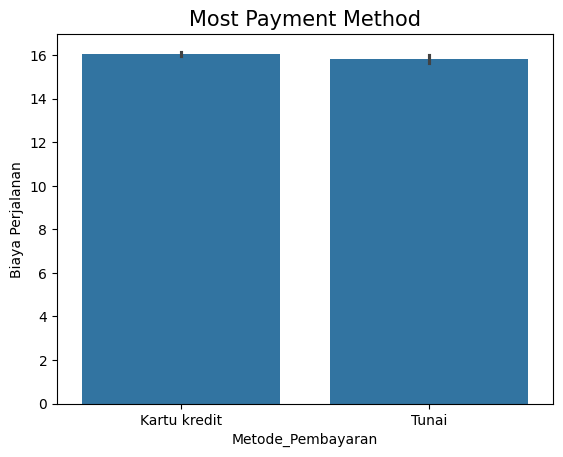

In [165]:
sns.barplot(data=rental_clean, x="Metode_Pembayaran", y="Biaya Perjalanan")
plt.title("Most Payment Method",size=15)
plt.show()

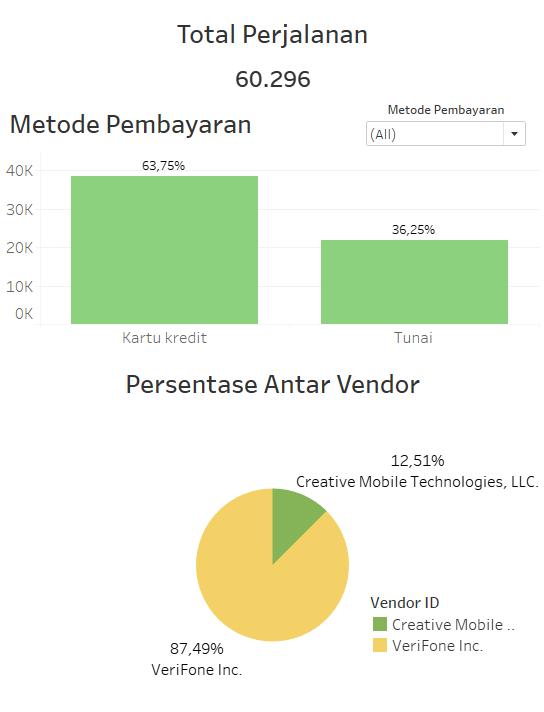

Dari visualisasi data berikut, diketahui total jumlah perjalanan sebanyak 60.296 dengan presentase pembayaran paling tinggi menggunakan kartu kredit.

Untuk perbandingan antar vendor, armada yg paling sering digunakan adalah milik VeriFone Inc. 
Data tersebut dapat di informasikan ke vendor Creative Mobile Technologies,LCC , agar vendor dapat melalukan evaluasi kenapa hanya mendapat order hanya 12,51% dari total order. langkah awal bisa di evaluasi terkait kenyamanan armada yg dimiliki agar dapat meningkatkan jumlah order vendor tersebut.


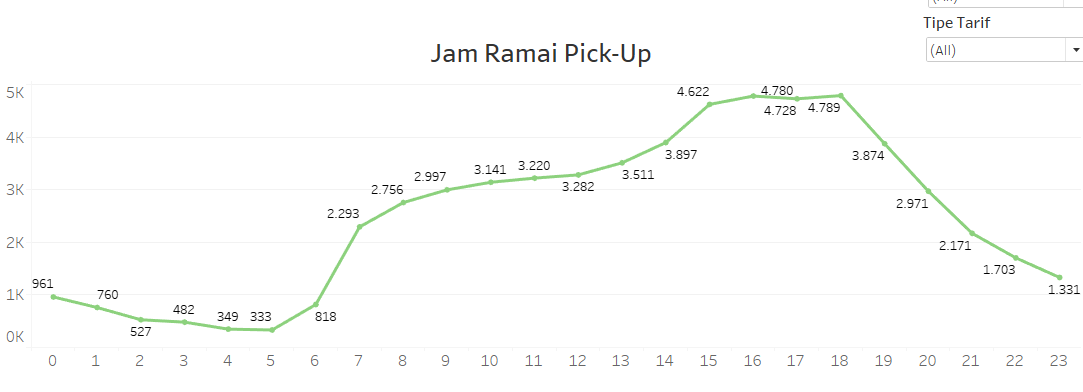

Berikut ini adalah grafik untuk mengetahui jumlah order berdasarkan jam. dapat di lihat terjadi lonjakan jumlah order yang sangat tinggi pada jam 15 s.d jam 18.
Untuk mengoptimalkan kepadatan jumlah order, maka perusahaan perlu mempersiapan armada yang mencukupi, agar dapat memenuhi demand dari custumer dan memaksimalkan profit perusahaan.


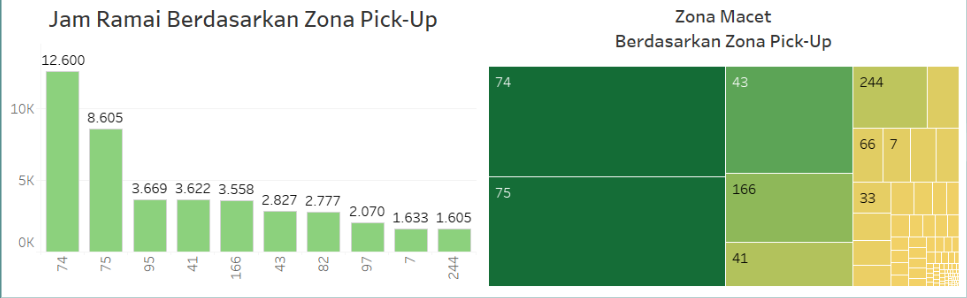

Setelah mengetahui waktu dimana demand order harus dipenuhi. perusahaan juga perlu mengetahui zona mana yang harus di jadikan prioritas. Karena jika armada datang ke zona macet namun demand tidak terlalu banyak, maka akan merugikan perusahaan antara lain armada stuck (tidak cepat selesaikan perjalanan) dan menghabiskan banyak bahan bakar.
Dari grafik di atas dapat dilihat, perusahaan dapat memperbanyak armada di jam-jam ramai pada zona 74, 75, 95 dan seterusnya. grafik map pada bagian kanan dijadikan acuan untuk menghindari zona macet jika sedikit demand order untuk menghindari kerugian.


**KESIMPULAN**

Dari analisa yang telah dilakukan, maka perusahaan dapat mengambil kesimpulan untuk melakukan langkah-langkah apa yang akan dilakukan untuk selanjutnya, yaitu:

1. Memaksimalkan armada yang dimiliki dengan mengetahui zona mana yang ramai picup yaitu zona 74, 75, 95, 41, dst. perusahaan dapat memetakan armada di area tersebut dan di jam 15 sampai jam 18
2. metode pembayaran yang paling diminati oleh customer adalah dengan menggunakan kartu kredit, perusahaan dapat melakukan pengecekan rutin pada mesin untuk penggunaan kartu kredit yang tersedia dalam mobil atau pada handphone driver dipastikan selalu bisa di gunakan untuk menghindari customer tidak jadi naik armada yg dimiliki karena tidak bisa melakukan pembayaran menggunakan kartu kredit
3. melakukan penghindara pada zona macet yang tidak ramai, jika armada di petakan di zona macet namun tidak ramai penumpang maka akan menimbulkan kerugian perusahaan karena memakan banyak bahan bakar kendaraan
